<h1> Part 1 : Predict the price of a house <h1>
<h2> Problem statement: The goal is to understand the relationship between house features and how these variables affect the house price.<h2>
    

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("DS - Assignment Part 1 data set.xlsx")

In [3]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


<h3>Checking data and Feature Engineering<h3>

In [4]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [5]:
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [6]:
data.shape

(414, 9)

In [7]:
# Finding correlation 
data.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


In [8]:
data['Transaction date']=data['Transaction date'].astype('str')

In [9]:
data.dtypes

Transaction date                             object
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [10]:
# Extracting the year of transaction from the 'Transaction date' column

data['transaction_year']=data['Transaction date'].str.split('.').str[0]

In [11]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,transaction_year
0,2012.9166667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012
1,2012.9166667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012
2,2013.5833333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013
3,2013.5,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013
4,2012.8333333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012


In [12]:
data=data.drop(['Transaction date'],axis=1)

In [13]:
data.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,transaction_year
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012


In [14]:
data['transaction_year']=data['transaction_year'].astype('float64')

In [15]:
data.dtypes

House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
transaction_year                            float64
dtype: object

In [16]:
titles=list(data.columns)
titles

['House Age',
 'Distance from nearest Metro station (km)',
 'Number of convenience stores',
 'latitude',
 'longitude',
 'Number of bedrooms',
 'House size (sqft)',
 'House price of unit area',
 'transaction_year']

In [17]:
# changing the positions of columns transaction_year and House price of unit area
titles[7],titles[8]=titles[8],titles[7]
titles

['House Age',
 'Distance from nearest Metro station (km)',
 'Number of convenience stores',
 'latitude',
 'longitude',
 'Number of bedrooms',
 'House size (sqft)',
 'transaction_year',
 'House price of unit area']

In [18]:
data=data[titles]
data.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),transaction_year,House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,2012.0,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,2012.0,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,2013.0,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,2013.0,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,2012.0,43.1


<h3>Exploratory Data Analysis<h3>

Text(0.5, 1.0, 'house_prices.corr()')

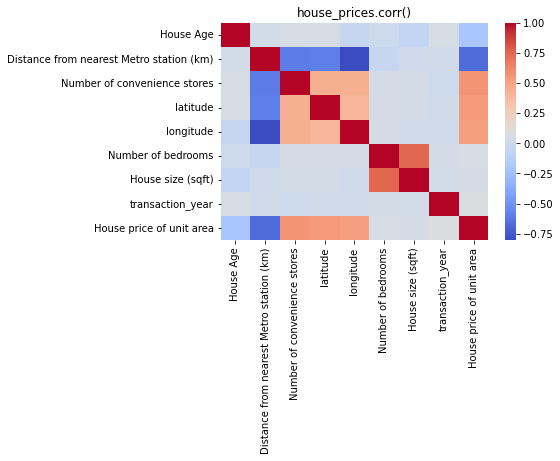

In [19]:
# Finding correlation between different features using Visualization technique

sns.heatmap(data.corr(),cmap='coolwarm')
plt.title('house_prices.corr()')

<h4>From the plot it is clearly visible that the features are mostly independent of each other but Number of bedrooms and House size are somewhat correlated followed by Number of convenience stores near the house location, latitude and longitude<h4>

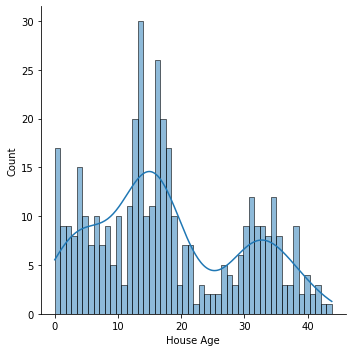

In [20]:
# Plotting Average house age

sns.displot(data['House Age'],kde=True,bins=50)

<AxesSubplot:xlabel='Number of convenience stores', ylabel='count'>

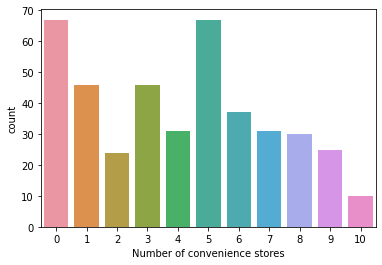

In [21]:
# Counting the Number of convenience stores

sns.countplot(x='Number of convenience stores',data=data)

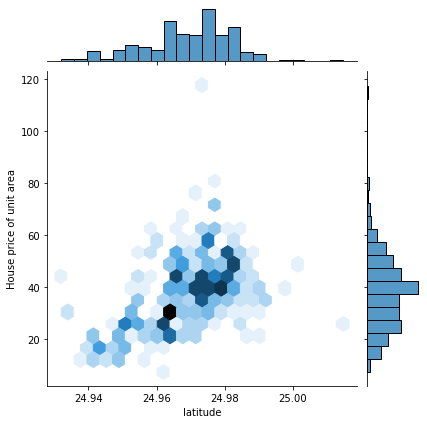

In [22]:
sns.jointplot(x='latitude',y='House price of unit area',data=data,kind='hex')

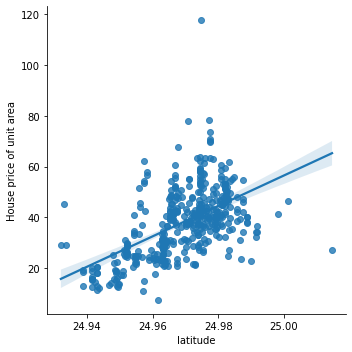

In [23]:
sns.lmplot(x='latitude',y='House price of unit area',data=data,palette='coolwarm')

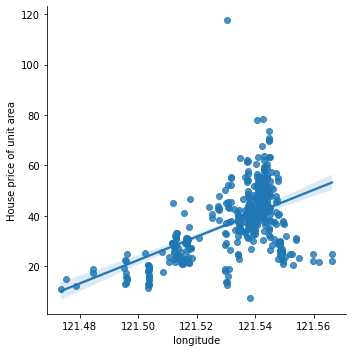

In [24]:
sns.lmplot(x='longitude',y='House price of unit area',data=data,palette='coolwarm')

<h4>We can clearly see that house prices are dependent on the location i.e the latitude and longitude of the house<h4>

In [25]:
data['transaction_year'].value_counts()

2013.0    288
2012.0    126
Name: transaction_year, dtype: int64

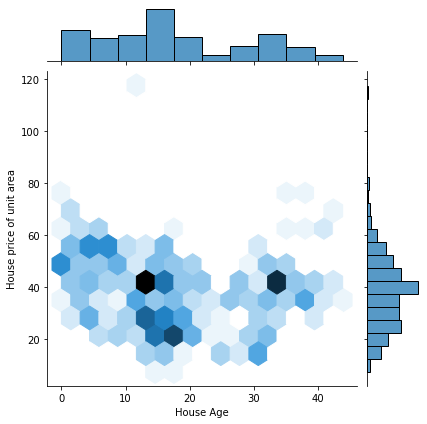

In [26]:
sns.jointplot(x='House Age',y='House price of unit area',data=data,kind='hex')

<h4>No clear relationship between house age and house price from above plot<h4>

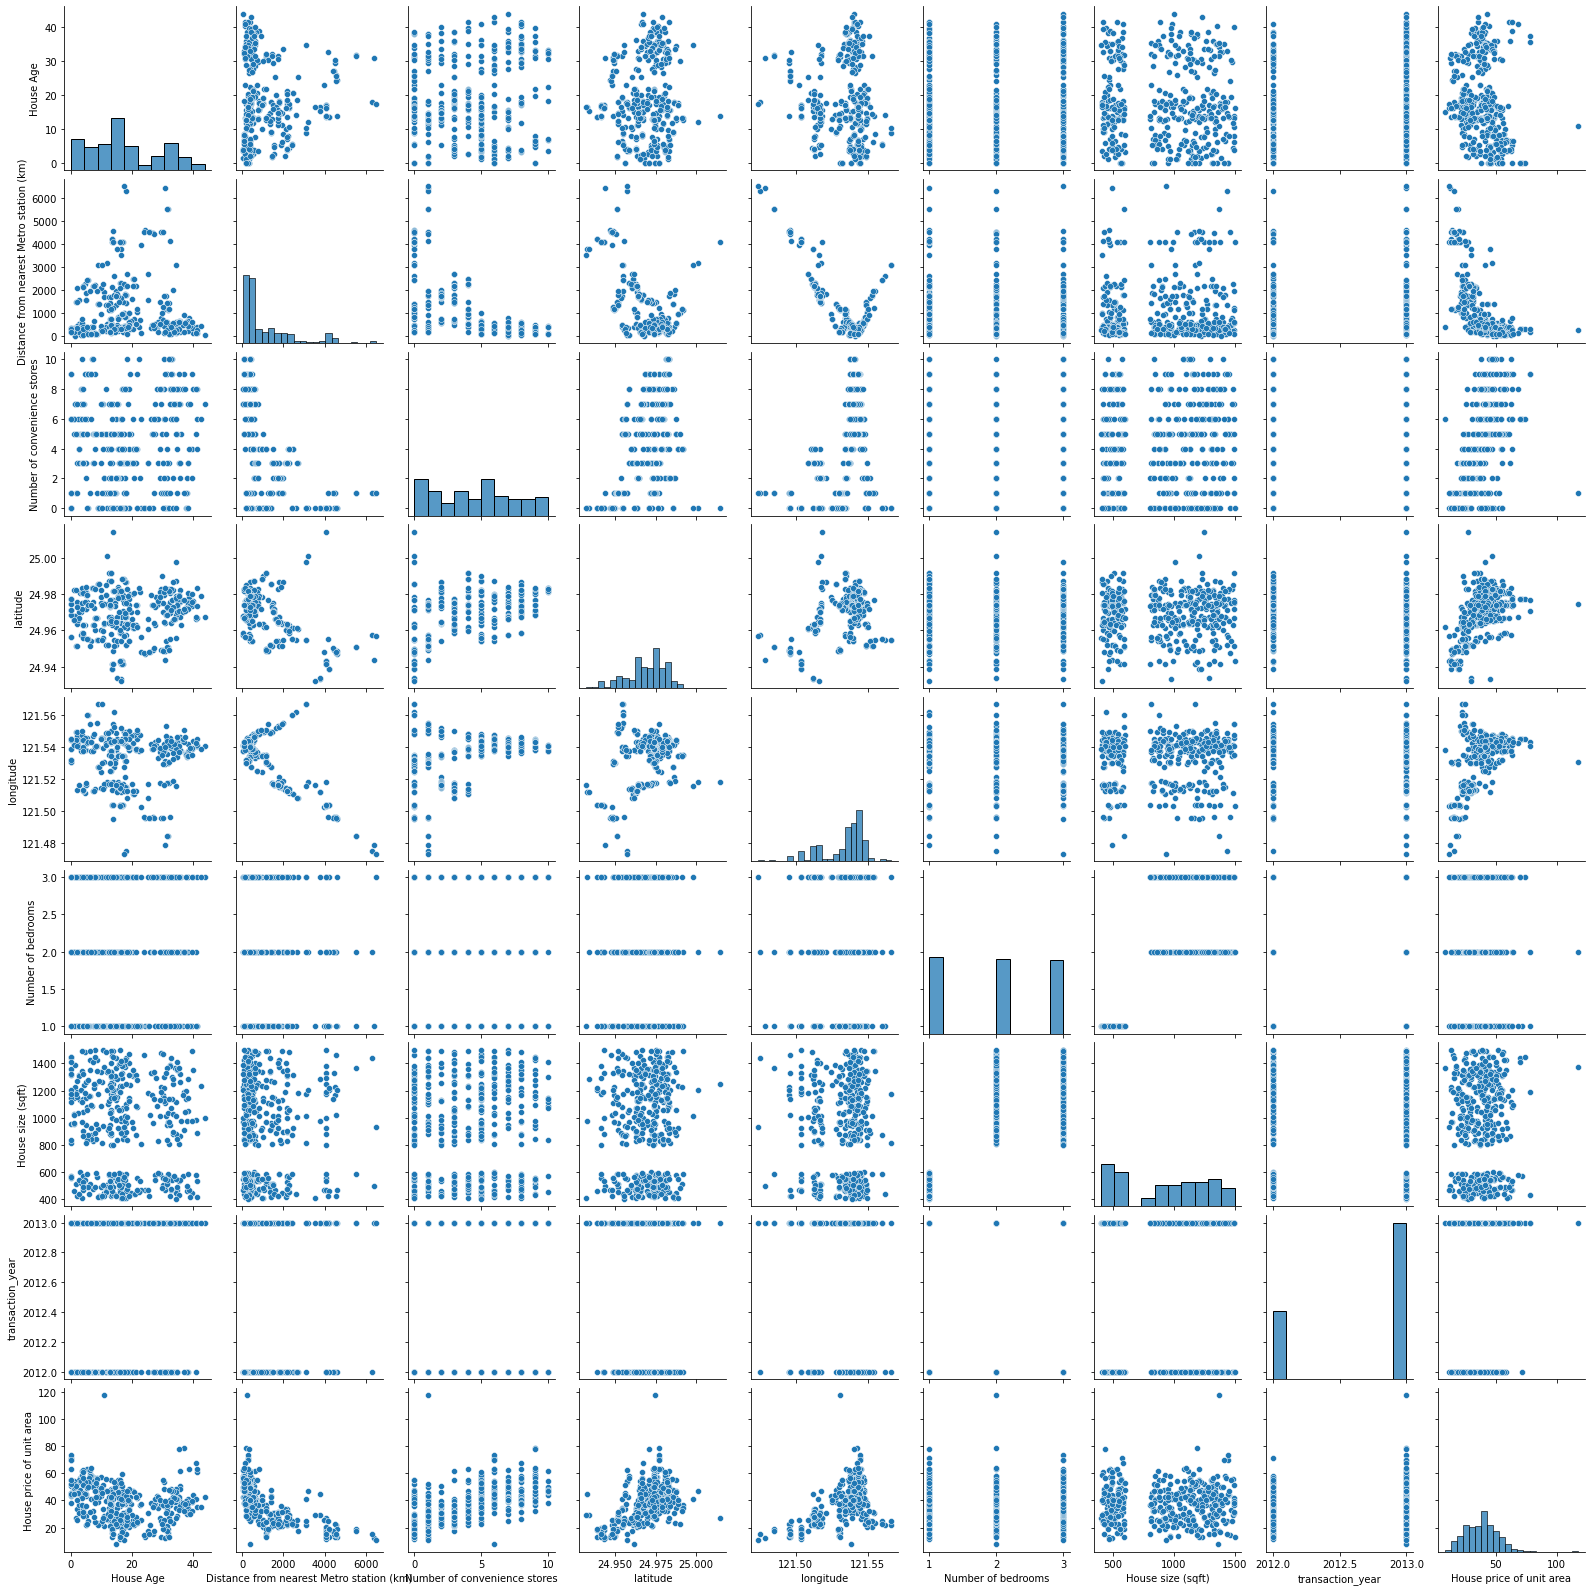

In [27]:
sns.pairplot(data)

<h3>Standardizing the variables using Standardscaler and then Training the data<h3>

In [28]:
data.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),transaction_year,House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,2012.0,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,2012.0,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,2013.0,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,2013.0,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,2012.0,43.1


In [29]:
data.tail()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),transaction_year,House price of unit area
409,13.7,4082.01500,0,24.94155,121.50381,3,803,2013.0,15.4
410,5.6,90.45606,9,24.97433,121.54310,2,1278,2012.0,50.0
411,18.8,390.96960,7,24.97923,121.53986,1,503,2013.0,40.6
412,8.1,104.81010,5,24.96674,121.54067,1,597,2013.0,52.5
413,6.5,90.45606,9,24.97433,121.54310,2,1097,2013.0,63.9


In [30]:
X=data.drop('House price of unit area',axis=1)
y=data['House price of unit area']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit(data.drop('House price of unit area',axis=1))

StandardScaler()

In [36]:
scaled_features = scaler.transform(data.drop('House price of unit area',axis=1))

In [37]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),transaction_year
0,1.255628,-0.792495,2.007407,1.125430,0.448762,-1.207899,-1.022920,-1.511858
1,0.157086,-0.616612,1.667503,0.912444,0.401139,0.014766,0.885321,-1.511858
2,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237432,0.368804,0.661438
3,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.014766,-0.162059,0.661438
4,-1.117223,-0.549997,0.307885,0.834188,0.592937,-1.207899,-1.263960,-1.511858


<h3>Creating, Training and predicting the Model using Linear Regression<h3>

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
predictions = lr.predict(X_test)

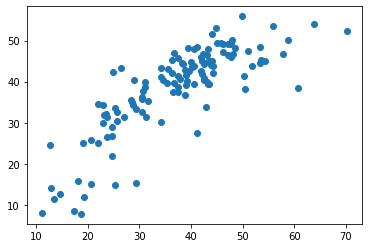

In [42]:
# Plotting chart between predictions and y_test

plt.scatter(y_test,predictions)

In [44]:
lr.score(X_test,y_test)

0.6430452968788191

In [45]:
# Regression Evaluation metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.500877925451897
MSE: 47.25234863516838
RMSE: 6.874034378381329


In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(),X, y ,cv = 5)
print(np.round(scores.mean(),4))

0.576


<h3>Creating and Training the Model using Lasso Regression<h3>

In [47]:
from sklearn import linear_model

In [48]:
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.5)

In [49]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.5)

In [50]:
lasso_reg.score(X_test,y_test)

0.5175423944980044

In [51]:
from sklearn.linear_model import LassoCV
scores = LassoCV(cv=5, random_state=0).fit(X, y)
scores.score(X, y)

0.48687355049613856

<h3>Creating and Training the Model using Ridge Regression<h3>

In [52]:
from sklearn import linear_model

In [53]:
ridge_reg=linear_model.Ridge(alpha=50,max_iter=100,tol=0.5)

In [54]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.5)

In [55]:
ridge_reg.score(X_test,y_test)

0.6092786022005067

In [56]:
from sklearn.linear_model import RidgeCV
scores = RidgeCV(cv=5).fit(X, y)
scores.score(X, y)

0.5666331741756432

<h3>Creating ,training and predicting the Model using Decision Tree and Random Forest Regressor<h3>

In [58]:
# there is no need for scaling down the features here

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = data.drop('House price of unit area',axis=1)
y = data['House price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [61]:
# Using Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor 

In [62]:
dtree=DecisionTreeRegressor()

In [63]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
predictions = dtree.predict(X_test)

In [65]:
dtree.score(X_test,y_test)

0.55350865083327

In [66]:
scores = cross_val_score(DecisionTreeRegressor(),X, y ,cv = 5)
print(np.round(scores.mean(),4))

0.2272


In [67]:
# Hyperparameter Tuning 

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [68]:
dec_reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [69]:
dec_reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [70]:
dec_reg.best_score_

0.60787859091634

In [71]:
dec_reg.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 0.5,
 'min_samples_split': 0.25}

In [72]:
# Using Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

In [73]:
rfc = RandomForestRegressor(n_estimators=600)

In [74]:
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600)

In [75]:
predictions = rfc.predict(X_test)

In [76]:
rfc.score(X_test,y_test)

0.7461872440715738

In [77]:
scores = cross_val_score(RandomForestRegressor(),X, y ,cv = 5)
print(np.round(scores.mean(),4))

0.6749


In [78]:
# predict the first row of the dataset
rfc.predict([[32.0,84.87882,10,24.98298,121.54024,1,575,2012.0]])

array([40.8215])

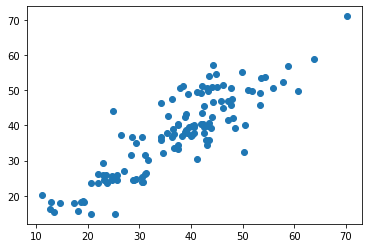

In [79]:
plt.scatter(y_test,predictions)

In [80]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [81]:
random_reg = GridSearchCV(RandomForestRegressor(),param_grid=param_grid)

In [82]:
random_reg.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [83]:
random_reg.best_score_

0.6169302602476987

In [84]:
dec_reg.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 0.5,
 'min_samples_split': 0.25}

<h3>Creating and Training the Model using Ensemble technique (Bagging)<h3> 

In [85]:
X=data.drop('House price of unit area',axis=1)
y=data['House price of unit area']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

In [90]:
scaler.fit(data.drop('House price of unit area',axis=1))

StandardScaler()

In [91]:
scaled_features = scaler.transform(data.drop('House price of unit area',axis=1))

In [92]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),transaction_year
0,1.255628,-0.792495,2.007407,1.125430,0.448762,-1.207899,-1.022920,-1.511858
1,0.157086,-0.616612,1.667503,0.912444,0.401139,0.014766,0.885321,-1.511858
2,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237432,0.368804,0.661438
3,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.014766,-0.162059,0.661438
4,-1.117223,-0.549997,0.307885,0.834188,0.592937,-1.207899,-1.263960,-1.511858


In [93]:
X_train.shape

(289, 8)

In [94]:
X_test.shape

(125, 8)

In [95]:
# Bagging technique using DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor
bag_model_dec=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                           n_estimators=100,
                           max_samples=0.8,
                           oob_score=True,
                           random_state=0)
bag_model_dec.fit(X_train,y_train)
bag_model_dec.oob_score_

0.6182939776577393

In [96]:
bag_model_dec.score(X_test,y_test)

0.7549360922176609

In [97]:
# Bagging technique using RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
bag_model_reg=BaggingRegressor(base_estimator=RandomForestRegressor(),
                            n_estimators=100,
                           max_samples=0.8,
                           oob_score=True,
                           random_state=0)
bag_model_reg.fit(X_train,y_train)
bag_model_reg.oob_score_

0.6490764354919437

In [98]:
bag_model_reg.score(X_test,y_test)

0.7737944123493943

<h3>Creating and Training the Model using Ensemble technique (Boosting)<h3>

In [99]:
# Using GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
grad_decent = GradientBoostingRegressor()
scores = cross_val_score(grad_decent,X, y ,cv = 5)
print(np.round(scores.mean(),4))

0.6906


In [100]:
# Using XGboost
from xgboost import XGBRegressor
xbg = XGBRegressor()
scores = cross_val_score(xbg,X, y ,cv = 5)
print(np.round(scores.mean(),4))

0.6425


In [101]:
# Using Catboost
from catboost import CatBoostRegressor
catr = CatBoostRegressor()
scores = cross_val_score(catr,X, y ,cv = 5)
print(np.round(scores.mean(),4))

Learning rate set to 0.034381
0:	learn: 13.4516728	total: 131ms	remaining: 2m 10s
1:	learn: 13.2163323	total: 135ms	remaining: 1m 7s
2:	learn: 12.9754672	total: 140ms	remaining: 46.5s
3:	learn: 12.7573473	total: 144ms	remaining: 35.8s
4:	learn: 12.5718314	total: 149ms	remaining: 29.6s
5:	learn: 12.3595181	total: 153ms	remaining: 25.3s
6:	learn: 12.1471907	total: 157ms	remaining: 22.3s
7:	learn: 11.9746059	total: 162ms	remaining: 20.1s
8:	learn: 11.7853499	total: 165ms	remaining: 18.2s
9:	learn: 11.6232443	total: 170ms	remaining: 16.8s
10:	learn: 11.4370873	total: 173ms	remaining: 15.6s
11:	learn: 11.2572004	total: 177ms	remaining: 14.6s
12:	learn: 11.1001342	total: 182ms	remaining: 13.8s
13:	learn: 10.9527146	total: 185ms	remaining: 13.1s
14:	learn: 10.8198399	total: 190ms	remaining: 12.5s
15:	learn: 10.6904637	total: 194ms	remaining: 12s
16:	learn: 10.5762665	total: 198ms	remaining: 11.5s
17:	learn: 10.4623142	total: 202ms	remaining: 11s
18:	learn: 10.3241194	total: 206ms	remaining: 1

172:	learn: 5.1337733	total: 819ms	remaining: 3.92s
173:	learn: 5.1254815	total: 823ms	remaining: 3.91s
174:	learn: 5.1107148	total: 827ms	remaining: 3.9s
175:	learn: 5.1065012	total: 831ms	remaining: 3.89s
176:	learn: 5.0898379	total: 834ms	remaining: 3.88s
177:	learn: 5.0848173	total: 838ms	remaining: 3.87s
178:	learn: 5.0782208	total: 841ms	remaining: 3.85s
179:	learn: 5.0679291	total: 844ms	remaining: 3.85s
180:	learn: 5.0538383	total: 847ms	remaining: 3.83s
181:	learn: 5.0498152	total: 852ms	remaining: 3.83s
182:	learn: 5.0423057	total: 856ms	remaining: 3.82s
183:	learn: 5.0278536	total: 860ms	remaining: 3.81s
184:	learn: 5.0234565	total: 864ms	remaining: 3.81s
185:	learn: 5.0051329	total: 868ms	remaining: 3.8s
186:	learn: 5.0019632	total: 872ms	remaining: 3.79s
187:	learn: 5.0004908	total: 873ms	remaining: 3.77s
188:	learn: 4.9888343	total: 877ms	remaining: 3.77s
189:	learn: 4.9836114	total: 882ms	remaining: 3.76s
190:	learn: 4.9769460	total: 886ms	remaining: 3.75s
191:	learn: 4.

348:	learn: 3.9740010	total: 1.47s	remaining: 2.75s
349:	learn: 3.9680611	total: 1.48s	remaining: 2.74s
350:	learn: 3.9624066	total: 1.48s	remaining: 2.74s
351:	learn: 3.9476015	total: 1.48s	remaining: 2.73s
352:	learn: 3.9408715	total: 1.49s	remaining: 2.73s
353:	learn: 3.9342760	total: 1.49s	remaining: 2.72s
354:	learn: 3.9291430	total: 1.49s	remaining: 2.72s
355:	learn: 3.9269392	total: 1.5s	remaining: 2.71s
356:	learn: 3.9145429	total: 1.5s	remaining: 2.71s
357:	learn: 3.9081257	total: 1.51s	remaining: 2.7s
358:	learn: 3.9070989	total: 1.51s	remaining: 2.7s
359:	learn: 3.9062057	total: 1.51s	remaining: 2.69s
360:	learn: 3.8976089	total: 1.52s	remaining: 2.69s
361:	learn: 3.8948060	total: 1.52s	remaining: 2.68s
362:	learn: 3.8875384	total: 1.52s	remaining: 2.67s
363:	learn: 3.8838778	total: 1.53s	remaining: 2.67s
364:	learn: 3.8804871	total: 1.53s	remaining: 2.66s
365:	learn: 3.8743658	total: 1.53s	remaining: 2.66s
366:	learn: 3.8686670	total: 1.54s	remaining: 2.65s
367:	learn: 3.85

520:	learn: 3.0723895	total: 2.13s	remaining: 1.96s
521:	learn: 3.0712734	total: 2.13s	remaining: 1.95s
522:	learn: 3.0631744	total: 2.14s	remaining: 1.95s
523:	learn: 3.0567536	total: 2.14s	remaining: 1.95s
524:	learn: 3.0558764	total: 2.14s	remaining: 1.94s
525:	learn: 3.0552404	total: 2.15s	remaining: 1.94s
526:	learn: 3.0517637	total: 2.15s	remaining: 1.93s
527:	learn: 3.0500140	total: 2.16s	remaining: 1.93s
528:	learn: 3.0470011	total: 2.16s	remaining: 1.92s
529:	learn: 3.0461162	total: 2.16s	remaining: 1.92s
530:	learn: 3.0399058	total: 2.17s	remaining: 1.91s
531:	learn: 3.0350673	total: 2.17s	remaining: 1.91s
532:	learn: 3.0340949	total: 2.17s	remaining: 1.91s
533:	learn: 3.0311618	total: 2.18s	remaining: 1.9s
534:	learn: 3.0285989	total: 2.18s	remaining: 1.9s
535:	learn: 3.0188119	total: 2.19s	remaining: 1.89s
536:	learn: 3.0128482	total: 2.19s	remaining: 1.89s
537:	learn: 3.0073975	total: 2.19s	remaining: 1.88s
538:	learn: 3.0066893	total: 2.2s	remaining: 1.88s
539:	learn: 3.0

689:	learn: 2.4527905	total: 2.79s	remaining: 1.25s
690:	learn: 2.4517423	total: 2.79s	remaining: 1.25s
691:	learn: 2.4492245	total: 2.79s	remaining: 1.24s
692:	learn: 2.4463375	total: 2.8s	remaining: 1.24s
693:	learn: 2.4407459	total: 2.8s	remaining: 1.24s
694:	learn: 2.4366298	total: 2.8s	remaining: 1.23s
695:	learn: 2.4359781	total: 2.81s	remaining: 1.23s
696:	learn: 2.4328119	total: 2.81s	remaining: 1.22s
697:	learn: 2.4271058	total: 2.82s	remaining: 1.22s
698:	learn: 2.4218547	total: 2.82s	remaining: 1.21s
699:	learn: 2.4174709	total: 2.82s	remaining: 1.21s
700:	learn: 2.4171548	total: 2.83s	remaining: 1.21s
701:	learn: 2.4122315	total: 2.83s	remaining: 1.2s
702:	learn: 2.4103741	total: 2.84s	remaining: 1.2s
703:	learn: 2.4081894	total: 2.84s	remaining: 1.19s
704:	learn: 2.4059421	total: 2.84s	remaining: 1.19s
705:	learn: 2.4045712	total: 2.85s	remaining: 1.19s
706:	learn: 2.4006715	total: 2.85s	remaining: 1.18s
707:	learn: 2.3959434	total: 2.85s	remaining: 1.18s
708:	learn: 2.391

863:	learn: 1.9913027	total: 3.45s	remaining: 543ms
864:	learn: 1.9883387	total: 3.45s	remaining: 539ms
865:	learn: 1.9861223	total: 3.46s	remaining: 535ms
866:	learn: 1.9836956	total: 3.46s	remaining: 531ms
867:	learn: 1.9815409	total: 3.46s	remaining: 527ms
868:	learn: 1.9804921	total: 3.47s	remaining: 523ms
869:	learn: 1.9789471	total: 3.47s	remaining: 519ms
870:	learn: 1.9766350	total: 3.47s	remaining: 515ms
871:	learn: 1.9741591	total: 3.48s	remaining: 511ms
872:	learn: 1.9727287	total: 3.48s	remaining: 507ms
873:	learn: 1.9724625	total: 3.49s	remaining: 503ms
874:	learn: 1.9720548	total: 3.49s	remaining: 499ms
875:	learn: 1.9680960	total: 3.49s	remaining: 495ms
876:	learn: 1.9638935	total: 3.5s	remaining: 490ms
877:	learn: 1.9623185	total: 3.5s	remaining: 487ms
878:	learn: 1.9594498	total: 3.5s	remaining: 483ms
879:	learn: 1.9556801	total: 3.51s	remaining: 478ms
880:	learn: 1.9534631	total: 3.51s	remaining: 475ms
881:	learn: 1.9520489	total: 3.52s	remaining: 471ms
882:	learn: 1.9

39:	learn: 7.9445199	total: 165ms	remaining: 3.97s
40:	learn: 7.8796226	total: 169ms	remaining: 3.96s
41:	learn: 7.8116412	total: 174ms	remaining: 3.96s
42:	learn: 7.7545437	total: 177ms	remaining: 3.94s
43:	learn: 7.6810672	total: 181ms	remaining: 3.93s
44:	learn: 7.6290126	total: 185ms	remaining: 3.92s
45:	learn: 7.5869031	total: 188ms	remaining: 3.91s
46:	learn: 7.5201828	total: 192ms	remaining: 3.9s
47:	learn: 7.4485966	total: 196ms	remaining: 3.89s
48:	learn: 7.3952862	total: 201ms	remaining: 3.9s
49:	learn: 7.3402257	total: 205ms	remaining: 3.89s
50:	learn: 7.2895623	total: 209ms	remaining: 3.88s
51:	learn: 7.2317606	total: 213ms	remaining: 3.88s
52:	learn: 7.1730117	total: 217ms	remaining: 3.87s
53:	learn: 7.1181665	total: 221ms	remaining: 3.87s
54:	learn: 7.0721710	total: 225ms	remaining: 3.87s
55:	learn: 7.0296432	total: 229ms	remaining: 3.87s
56:	learn: 6.9747858	total: 243ms	remaining: 4.01s
57:	learn: 6.9310757	total: 247ms	remaining: 4.01s
58:	learn: 6.8807501	total: 251ms

199:	learn: 4.3554749	total: 820ms	remaining: 3.28s
200:	learn: 4.3485203	total: 825ms	remaining: 3.28s
201:	learn: 4.3429192	total: 828ms	remaining: 3.27s
202:	learn: 4.3369620	total: 832ms	remaining: 3.27s
203:	learn: 4.3328410	total: 835ms	remaining: 3.26s
204:	learn: 4.3291122	total: 839ms	remaining: 3.25s
205:	learn: 4.3257821	total: 842ms	remaining: 3.25s
206:	learn: 4.3156054	total: 848ms	remaining: 3.25s
207:	learn: 4.3066355	total: 852ms	remaining: 3.24s
208:	learn: 4.3042062	total: 856ms	remaining: 3.24s
209:	learn: 4.2911303	total: 861ms	remaining: 3.24s
210:	learn: 4.2878011	total: 865ms	remaining: 3.23s
211:	learn: 4.2775856	total: 869ms	remaining: 3.23s
212:	learn: 4.2668479	total: 873ms	remaining: 3.23s
213:	learn: 4.2581746	total: 877ms	remaining: 3.22s
214:	learn: 4.2551252	total: 881ms	remaining: 3.22s
215:	learn: 4.2496509	total: 885ms	remaining: 3.21s
216:	learn: 4.2385242	total: 890ms	remaining: 3.21s
217:	learn: 4.2314147	total: 894ms	remaining: 3.21s
218:	learn: 

367:	learn: 3.2931425	total: 1.47s	remaining: 2.53s
368:	learn: 3.2921959	total: 1.48s	remaining: 2.53s
369:	learn: 3.2911566	total: 1.48s	remaining: 2.52s
370:	learn: 3.2834782	total: 1.49s	remaining: 2.52s
371:	learn: 3.2730354	total: 1.49s	remaining: 2.51s
372:	learn: 3.2628092	total: 1.49s	remaining: 2.51s
373:	learn: 3.2569118	total: 1.5s	remaining: 2.5s
374:	learn: 3.2474042	total: 1.5s	remaining: 2.5s
375:	learn: 3.2389118	total: 1.5s	remaining: 2.5s
376:	learn: 3.2343497	total: 1.51s	remaining: 2.49s
377:	learn: 3.2336185	total: 1.51s	remaining: 2.49s
378:	learn: 3.2250235	total: 1.52s	remaining: 2.48s
379:	learn: 3.2240084	total: 1.52s	remaining: 2.48s
380:	learn: 3.2230238	total: 1.52s	remaining: 2.48s
381:	learn: 3.2173500	total: 1.53s	remaining: 2.47s
382:	learn: 3.2120682	total: 1.53s	remaining: 2.47s
383:	learn: 3.2050051	total: 1.53s	remaining: 2.46s
384:	learn: 3.2021090	total: 1.54s	remaining: 2.46s
385:	learn: 3.1909045	total: 1.54s	remaining: 2.45s
386:	learn: 3.1899

541:	learn: 2.4955285	total: 2.13s	remaining: 1.8s
542:	learn: 2.4916565	total: 2.13s	remaining: 1.8s
543:	learn: 2.4890448	total: 2.14s	remaining: 1.79s
544:	learn: 2.4850105	total: 2.14s	remaining: 1.79s
545:	learn: 2.4843383	total: 2.15s	remaining: 1.78s
546:	learn: 2.4801589	total: 2.15s	remaining: 1.78s
547:	learn: 2.4794857	total: 2.15s	remaining: 1.77s
548:	learn: 2.4763788	total: 2.16s	remaining: 1.77s
549:	learn: 2.4745670	total: 2.16s	remaining: 1.77s
550:	learn: 2.4721357	total: 2.16s	remaining: 1.76s
551:	learn: 2.4706005	total: 2.17s	remaining: 1.76s
552:	learn: 2.4664134	total: 2.17s	remaining: 1.75s
553:	learn: 2.4614607	total: 2.17s	remaining: 1.75s
554:	learn: 2.4565292	total: 2.18s	remaining: 1.75s
555:	learn: 2.4558647	total: 2.18s	remaining: 1.74s
556:	learn: 2.4514382	total: 2.18s	remaining: 1.74s
557:	learn: 2.4478532	total: 2.19s	remaining: 1.73s
558:	learn: 2.4444087	total: 2.19s	remaining: 1.73s
559:	learn: 2.4440177	total: 2.19s	remaining: 1.72s
560:	learn: 2.

712:	learn: 1.9757089	total: 2.79s	remaining: 1.12s
713:	learn: 1.9712999	total: 2.79s	remaining: 1.12s
714:	learn: 1.9691825	total: 2.79s	remaining: 1.11s
715:	learn: 1.9685241	total: 2.8s	remaining: 1.11s
716:	learn: 1.9680502	total: 2.8s	remaining: 1.11s
717:	learn: 1.9678378	total: 2.81s	remaining: 1.1s
718:	learn: 1.9641732	total: 2.81s	remaining: 1.1s
719:	learn: 1.9616115	total: 2.81s	remaining: 1.09s
720:	learn: 1.9584991	total: 2.82s	remaining: 1.09s
721:	learn: 1.9541652	total: 2.82s	remaining: 1.09s
722:	learn: 1.9518910	total: 2.83s	remaining: 1.08s
723:	learn: 1.9506339	total: 2.83s	remaining: 1.08s
724:	learn: 1.9472245	total: 2.84s	remaining: 1.07s
725:	learn: 1.9442108	total: 2.84s	remaining: 1.07s
726:	learn: 1.9414775	total: 2.84s	remaining: 1.07s
727:	learn: 1.9379151	total: 2.85s	remaining: 1.06s
728:	learn: 1.9343047	total: 2.85s	remaining: 1.06s
729:	learn: 1.9322365	total: 2.85s	remaining: 1.06s
730:	learn: 1.9277000	total: 2.86s	remaining: 1.05s
731:	learn: 1.92

894:	learn: 1.5724164	total: 3.45s	remaining: 404ms
895:	learn: 1.5703414	total: 3.45s	remaining: 401ms
896:	learn: 1.5659703	total: 3.45s	remaining: 397ms
897:	learn: 1.5628901	total: 3.46s	remaining: 393ms
898:	learn: 1.5586454	total: 3.46s	remaining: 389ms
899:	learn: 1.5563054	total: 3.46s	remaining: 385ms
900:	learn: 1.5539503	total: 3.47s	remaining: 381ms
901:	learn: 1.5519753	total: 3.47s	remaining: 377ms
902:	learn: 1.5489335	total: 3.47s	remaining: 373ms
903:	learn: 1.5475742	total: 3.48s	remaining: 369ms
904:	learn: 1.5455903	total: 3.48s	remaining: 365ms
905:	learn: 1.5433417	total: 3.48s	remaining: 361ms
906:	learn: 1.5409413	total: 3.49s	remaining: 357ms
907:	learn: 1.5373466	total: 3.49s	remaining: 354ms
908:	learn: 1.5353136	total: 3.49s	remaining: 350ms
909:	learn: 1.5350953	total: 3.5s	remaining: 346ms
910:	learn: 1.5343499	total: 3.5s	remaining: 342ms
911:	learn: 1.5306322	total: 3.5s	remaining: 338ms
912:	learn: 1.5287874	total: 3.51s	remaining: 334ms
913:	learn: 1.5

81:	learn: 6.4914548	total: 609ms	remaining: 6.82s
82:	learn: 6.4606009	total: 613ms	remaining: 6.77s
83:	learn: 6.4357142	total: 616ms	remaining: 6.72s
84:	learn: 6.4084737	total: 621ms	remaining: 6.69s
85:	learn: 6.3772836	total: 627ms	remaining: 6.66s
86:	learn: 6.3474516	total: 635ms	remaining: 6.66s
87:	learn: 6.3298501	total: 637ms	remaining: 6.61s
88:	learn: 6.3028104	total: 641ms	remaining: 6.56s
89:	learn: 6.2858048	total: 644ms	remaining: 6.51s
90:	learn: 6.2600983	total: 649ms	remaining: 6.48s
91:	learn: 6.2364018	total: 653ms	remaining: 6.44s
92:	learn: 6.2226187	total: 656ms	remaining: 6.4s
93:	learn: 6.2090807	total: 660ms	remaining: 6.36s
94:	learn: 6.1874655	total: 662ms	remaining: 6.3s
95:	learn: 6.1749172	total: 665ms	remaining: 6.26s
96:	learn: 6.1511587	total: 668ms	remaining: 6.22s
97:	learn: 6.1392394	total: 671ms	remaining: 6.18s
98:	learn: 6.1275668	total: 675ms	remaining: 6.14s
99:	learn: 6.1062639	total: 678ms	remaining: 6.11s
100:	learn: 6.0739394	total: 683m

245:	learn: 4.6755380	total: 1.27s	remaining: 3.89s
246:	learn: 4.6739297	total: 1.27s	remaining: 3.89s
247:	learn: 4.6690471	total: 1.28s	remaining: 3.88s
248:	learn: 4.6523907	total: 1.28s	remaining: 3.87s
249:	learn: 4.6436705	total: 1.29s	remaining: 3.86s
250:	learn: 4.6299728	total: 1.29s	remaining: 3.85s
251:	learn: 4.6222451	total: 1.29s	remaining: 3.84s
252:	learn: 4.6160870	total: 1.3s	remaining: 3.83s
253:	learn: 4.6143117	total: 1.3s	remaining: 3.83s
254:	learn: 4.6058592	total: 1.31s	remaining: 3.82s
255:	learn: 4.6008168	total: 1.31s	remaining: 3.81s
256:	learn: 4.5909451	total: 1.32s	remaining: 3.81s
257:	learn: 4.5887675	total: 1.32s	remaining: 3.8s
258:	learn: 4.5865049	total: 1.32s	remaining: 3.79s
259:	learn: 4.5776966	total: 1.33s	remaining: 3.78s
260:	learn: 4.5633833	total: 1.34s	remaining: 3.78s
261:	learn: 4.5530321	total: 1.34s	remaining: 3.77s
262:	learn: 4.5430481	total: 1.34s	remaining: 3.77s
263:	learn: 4.5314761	total: 1.35s	remaining: 3.76s
264:	learn: 4.5

405:	learn: 3.7406199	total: 1.92s	remaining: 2.81s
406:	learn: 3.7368876	total: 1.92s	remaining: 2.8s
407:	learn: 3.7310808	total: 1.93s	remaining: 2.8s
408:	learn: 3.7212034	total: 1.93s	remaining: 2.79s
409:	learn: 3.7120687	total: 1.94s	remaining: 2.79s
410:	learn: 3.7046778	total: 1.94s	remaining: 2.78s
411:	learn: 3.7041091	total: 1.94s	remaining: 2.77s
412:	learn: 3.6988069	total: 1.95s	remaining: 2.77s
413:	learn: 3.6949114	total: 1.95s	remaining: 2.76s
414:	learn: 3.6905894	total: 1.95s	remaining: 2.75s
415:	learn: 3.6851621	total: 1.96s	remaining: 2.75s
416:	learn: 3.6834915	total: 1.96s	remaining: 2.74s
417:	learn: 3.6825206	total: 1.97s	remaining: 2.74s
418:	learn: 3.6818635	total: 1.97s	remaining: 2.73s
419:	learn: 3.6778400	total: 1.98s	remaining: 2.73s
420:	learn: 3.6666277	total: 1.98s	remaining: 2.72s
421:	learn: 3.6597692	total: 1.98s	remaining: 2.72s
422:	learn: 3.6567159	total: 1.99s	remaining: 2.71s
423:	learn: 3.6561539	total: 1.99s	remaining: 2.7s
424:	learn: 3.6

601:	learn: 2.8749137	total: 2.74s	remaining: 1.81s
602:	learn: 2.8726650	total: 2.75s	remaining: 1.81s
603:	learn: 2.8703698	total: 2.75s	remaining: 1.8s
604:	learn: 2.8636687	total: 2.75s	remaining: 1.8s
605:	learn: 2.8605871	total: 2.76s	remaining: 1.79s
606:	learn: 2.8579642	total: 2.76s	remaining: 1.79s
607:	learn: 2.8572117	total: 2.77s	remaining: 1.78s
608:	learn: 2.8538423	total: 2.77s	remaining: 1.78s
609:	learn: 2.8497898	total: 2.77s	remaining: 1.77s
610:	learn: 2.8477863	total: 2.78s	remaining: 1.77s
611:	learn: 2.8471572	total: 2.78s	remaining: 1.76s
612:	learn: 2.8422531	total: 2.78s	remaining: 1.76s
613:	learn: 2.8384875	total: 2.79s	remaining: 1.75s
614:	learn: 2.8374503	total: 2.79s	remaining: 1.75s
615:	learn: 2.8337092	total: 2.8s	remaining: 1.74s
616:	learn: 2.8290444	total: 2.8s	remaining: 1.74s
617:	learn: 2.8237639	total: 2.81s	remaining: 1.73s
618:	learn: 2.8189461	total: 2.81s	remaining: 1.73s
619:	learn: 2.8187474	total: 2.81s	remaining: 1.72s
620:	learn: 2.81

760:	learn: 2.3590636	total: 3.41s	remaining: 1.07s
761:	learn: 2.3554065	total: 3.41s	remaining: 1.06s
762:	learn: 2.3548418	total: 3.42s	remaining: 1.06s
763:	learn: 2.3504318	total: 3.42s	remaining: 1.06s
764:	learn: 2.3484459	total: 3.42s	remaining: 1.05s
765:	learn: 2.3453376	total: 3.43s	remaining: 1.05s
766:	learn: 2.3435964	total: 3.44s	remaining: 1.04s
767:	learn: 2.3403682	total: 3.44s	remaining: 1.04s
768:	learn: 2.3370393	total: 3.45s	remaining: 1.04s
769:	learn: 2.3340472	total: 3.45s	remaining: 1.03s
770:	learn: 2.3328474	total: 3.46s	remaining: 1.03s
771:	learn: 2.3297668	total: 3.46s	remaining: 1.02s
772:	learn: 2.3289852	total: 3.46s	remaining: 1.02s
773:	learn: 2.3224566	total: 3.47s	remaining: 1.01s
774:	learn: 2.3203440	total: 3.47s	remaining: 1.01s
775:	learn: 2.3176754	total: 3.48s	remaining: 1s
776:	learn: 2.3161412	total: 3.48s	remaining: 999ms
777:	learn: 2.3110842	total: 3.48s	remaining: 994ms
778:	learn: 2.3089227	total: 3.49s	remaining: 990ms
779:	learn: 2.3

957:	learn: 1.9463396	total: 4.23s	remaining: 185ms
958:	learn: 1.9430833	total: 4.23s	remaining: 181ms
959:	learn: 1.9422138	total: 4.24s	remaining: 177ms
960:	learn: 1.9418801	total: 4.24s	remaining: 172ms
961:	learn: 1.9408895	total: 4.25s	remaining: 168ms
962:	learn: 1.9407481	total: 4.25s	remaining: 163ms
963:	learn: 1.9402702	total: 4.26s	remaining: 159ms
964:	learn: 1.9397545	total: 4.26s	remaining: 155ms
965:	learn: 1.9353980	total: 4.26s	remaining: 150ms
966:	learn: 1.9336019	total: 4.27s	remaining: 146ms
967:	learn: 1.9307201	total: 4.27s	remaining: 141ms
968:	learn: 1.9292358	total: 4.28s	remaining: 137ms
969:	learn: 1.9270005	total: 4.28s	remaining: 132ms
970:	learn: 1.9268299	total: 4.28s	remaining: 128ms
971:	learn: 1.9253725	total: 4.29s	remaining: 124ms
972:	learn: 1.9244233	total: 4.29s	remaining: 119ms
973:	learn: 1.9205353	total: 4.3s	remaining: 115ms
974:	learn: 1.9191949	total: 4.3s	remaining: 110ms
975:	learn: 1.9175615	total: 4.3s	remaining: 106ms
976:	learn: 1.9

149:	learn: 4.6362508	total: 718ms	remaining: 4.07s
150:	learn: 4.6264359	total: 721ms	remaining: 4.05s
151:	learn: 4.6191333	total: 723ms	remaining: 4.03s
152:	learn: 4.6070355	total: 725ms	remaining: 4.01s
153:	learn: 4.6018178	total: 730ms	remaining: 4.01s
154:	learn: 4.5936030	total: 735ms	remaining: 4s
155:	learn: 4.5835946	total: 740ms	remaining: 4s
156:	learn: 4.5729512	total: 744ms	remaining: 3.99s
157:	learn: 4.5669061	total: 748ms	remaining: 3.98s
158:	learn: 4.5512268	total: 751ms	remaining: 3.97s
159:	learn: 4.5418244	total: 754ms	remaining: 3.96s
160:	learn: 4.5350646	total: 758ms	remaining: 3.95s
161:	learn: 4.5288066	total: 762ms	remaining: 3.94s
162:	learn: 4.5195243	total: 766ms	remaining: 3.93s
163:	learn: 4.5119630	total: 769ms	remaining: 3.92s
164:	learn: 4.5031753	total: 773ms	remaining: 3.91s
165:	learn: 4.4966824	total: 777ms	remaining: 3.9s
166:	learn: 4.4884306	total: 782ms	remaining: 3.9s
167:	learn: 4.4824980	total: 785ms	remaining: 3.89s
168:	learn: 4.471415

314:	learn: 3.6148971	total: 1.39s	remaining: 3.03s
315:	learn: 3.6097785	total: 1.4s	remaining: 3.02s
316:	learn: 3.6031035	total: 1.4s	remaining: 3.01s
317:	learn: 3.5986544	total: 1.4s	remaining: 3.01s
318:	learn: 3.5896916	total: 1.41s	remaining: 3s
319:	learn: 3.5824982	total: 1.41s	remaining: 3s
320:	learn: 3.5731214	total: 1.41s	remaining: 2.99s
321:	learn: 3.5686075	total: 1.42s	remaining: 2.99s
322:	learn: 3.5625223	total: 1.42s	remaining: 2.98s
323:	learn: 3.5527004	total: 1.43s	remaining: 2.98s
324:	learn: 3.5434909	total: 1.43s	remaining: 2.97s
325:	learn: 3.5423837	total: 1.43s	remaining: 2.96s
326:	learn: 3.5413269	total: 1.44s	remaining: 2.96s
327:	learn: 3.5349895	total: 1.44s	remaining: 2.96s
328:	learn: 3.5286321	total: 1.45s	remaining: 2.95s
329:	learn: 3.5250829	total: 1.45s	remaining: 2.94s
330:	learn: 3.5167077	total: 1.45s	remaining: 2.94s
331:	learn: 3.5120911	total: 1.46s	remaining: 2.93s
332:	learn: 3.5112065	total: 1.46s	remaining: 2.93s
333:	learn: 3.5023709

513:	learn: 2.6895487	total: 2.23s	remaining: 2.11s
514:	learn: 2.6891350	total: 2.24s	remaining: 2.11s
515:	learn: 2.6843276	total: 2.24s	remaining: 2.1s
516:	learn: 2.6838418	total: 2.25s	remaining: 2.1s
517:	learn: 2.6809950	total: 2.25s	remaining: 2.09s
518:	learn: 2.6752822	total: 2.25s	remaining: 2.09s
519:	learn: 2.6696100	total: 2.25s	remaining: 2.08s
520:	learn: 2.6644909	total: 2.26s	remaining: 2.08s
521:	learn: 2.6614170	total: 2.26s	remaining: 2.07s
522:	learn: 2.6555575	total: 2.27s	remaining: 2.07s
523:	learn: 2.6502394	total: 2.27s	remaining: 2.06s
524:	learn: 2.6450929	total: 2.27s	remaining: 2.06s
525:	learn: 2.6400834	total: 2.28s	remaining: 2.05s
526:	learn: 2.6365066	total: 2.3s	remaining: 2.07s
527:	learn: 2.6328922	total: 2.31s	remaining: 2.06s
528:	learn: 2.6294318	total: 2.31s	remaining: 2.06s
529:	learn: 2.6247400	total: 2.31s	remaining: 2.05s
530:	learn: 2.6186633	total: 2.31s	remaining: 2.04s
531:	learn: 2.6136415	total: 2.32s	remaining: 2.04s
532:	learn: 2.6

706:	learn: 2.1748520	total: 3.06s	remaining: 1.27s
707:	learn: 2.1713997	total: 3.06s	remaining: 1.26s
708:	learn: 2.1681873	total: 3.07s	remaining: 1.26s
709:	learn: 2.1664127	total: 3.07s	remaining: 1.25s
710:	learn: 2.1628202	total: 3.08s	remaining: 1.25s
711:	learn: 2.1599744	total: 3.08s	remaining: 1.25s
712:	learn: 2.1562618	total: 3.08s	remaining: 1.24s
713:	learn: 2.1522267	total: 3.09s	remaining: 1.24s
714:	learn: 2.1480790	total: 3.09s	remaining: 1.23s
715:	learn: 2.1430866	total: 3.1s	remaining: 1.23s
716:	learn: 2.1406002	total: 3.1s	remaining: 1.22s
717:	learn: 2.1369267	total: 3.1s	remaining: 1.22s
718:	learn: 2.1337100	total: 3.11s	remaining: 1.21s
719:	learn: 2.1335451	total: 3.11s	remaining: 1.21s
720:	learn: 2.1311396	total: 3.12s	remaining: 1.21s
721:	learn: 2.1309259	total: 3.12s	remaining: 1.2s
722:	learn: 2.1278321	total: 3.12s	remaining: 1.2s
723:	learn: 2.1253878	total: 3.13s	remaining: 1.19s
724:	learn: 2.1246774	total: 3.13s	remaining: 1.19s
725:	learn: 2.123

900:	learn: 1.7795543	total: 3.89s	remaining: 427ms
901:	learn: 1.7776243	total: 3.89s	remaining: 423ms
902:	learn: 1.7769331	total: 3.89s	remaining: 418ms
903:	learn: 1.7741784	total: 3.9s	remaining: 414ms
904:	learn: 1.7718757	total: 3.9s	remaining: 410ms
905:	learn: 1.7690994	total: 3.9s	remaining: 405ms
906:	learn: 1.7680618	total: 3.91s	remaining: 401ms
907:	learn: 1.7658595	total: 3.91s	remaining: 396ms
908:	learn: 1.7638392	total: 3.92s	remaining: 392ms
909:	learn: 1.7637141	total: 3.92s	remaining: 388ms
910:	learn: 1.7622402	total: 3.92s	remaining: 383ms
911:	learn: 1.7613591	total: 3.93s	remaining: 379ms
912:	learn: 1.7597400	total: 3.93s	remaining: 375ms
913:	learn: 1.7574313	total: 3.93s	remaining: 370ms
914:	learn: 1.7572738	total: 3.94s	remaining: 366ms
915:	learn: 1.7548332	total: 3.94s	remaining: 362ms
916:	learn: 1.7543443	total: 3.95s	remaining: 357ms
917:	learn: 1.7514292	total: 3.95s	remaining: 353ms
918:	learn: 1.7498445	total: 3.95s	remaining: 349ms
919:	learn: 1.7

77:	learn: 6.5871168	total: 323ms	remaining: 3.81s
78:	learn: 6.5638858	total: 327ms	remaining: 3.81s
79:	learn: 6.5318806	total: 331ms	remaining: 3.8s
80:	learn: 6.5025895	total: 334ms	remaining: 3.79s
81:	learn: 6.4767453	total: 338ms	remaining: 3.79s
82:	learn: 6.4490072	total: 342ms	remaining: 3.78s
83:	learn: 6.4237848	total: 347ms	remaining: 3.78s
84:	learn: 6.3949228	total: 350ms	remaining: 3.77s
85:	learn: 6.3652607	total: 354ms	remaining: 3.76s
86:	learn: 6.3349737	total: 358ms	remaining: 3.75s
87:	learn: 6.3187757	total: 378ms	remaining: 3.92s
88:	learn: 6.2965301	total: 381ms	remaining: 3.9s
89:	learn: 6.2691479	total: 385ms	remaining: 3.89s
90:	learn: 6.2467932	total: 388ms	remaining: 3.88s
91:	learn: 6.2263249	total: 392ms	remaining: 3.87s
92:	learn: 6.2117457	total: 396ms	remaining: 3.86s
93:	learn: 6.1914511	total: 399ms	remaining: 3.85s
94:	learn: 6.1751951	total: 402ms	remaining: 3.83s
95:	learn: 6.1557049	total: 405ms	remaining: 3.82s
96:	learn: 6.1302368	total: 409ms

244:	learn: 4.5322362	total: 996ms	remaining: 3.07s
245:	learn: 4.5306806	total: 999ms	remaining: 3.06s
246:	learn: 4.5296309	total: 1s	remaining: 3.05s
247:	learn: 4.5273289	total: 1s	remaining: 3.05s
248:	learn: 4.5165356	total: 1.01s	remaining: 3.04s
249:	learn: 4.5086655	total: 1.01s	remaining: 3.03s
250:	learn: 4.5025968	total: 1.01s	remaining: 3.03s
251:	learn: 4.4997903	total: 1.02s	remaining: 3.02s
252:	learn: 4.4983756	total: 1.02s	remaining: 3.02s
253:	learn: 4.4883198	total: 1.02s	remaining: 3.01s
254:	learn: 4.4769651	total: 1.03s	remaining: 3s
255:	learn: 4.4755496	total: 1.03s	remaining: 3s
256:	learn: 4.4745912	total: 1.06s	remaining: 3.06s
257:	learn: 4.4732850	total: 1.06s	remaining: 3.06s
258:	learn: 4.4671601	total: 1.07s	remaining: 3.05s
259:	learn: 4.4588550	total: 1.07s	remaining: 3.05s
260:	learn: 4.4428889	total: 1.07s	remaining: 3.04s
261:	learn: 4.4277072	total: 1.08s	remaining: 3.04s
262:	learn: 4.4263293	total: 1.08s	remaining: 3.03s
263:	learn: 4.4250008	to

409:	learn: 3.4908806	total: 1.68s	remaining: 2.41s
410:	learn: 3.4841632	total: 1.68s	remaining: 2.41s
411:	learn: 3.4789858	total: 1.68s	remaining: 2.4s
412:	learn: 3.4723837	total: 1.69s	remaining: 2.4s
413:	learn: 3.4654501	total: 1.69s	remaining: 2.39s
414:	learn: 3.4569450	total: 1.7s	remaining: 2.39s
415:	learn: 3.4533271	total: 1.7s	remaining: 2.38s
416:	learn: 3.4488876	total: 1.7s	remaining: 2.38s
417:	learn: 3.4441920	total: 1.71s	remaining: 2.38s
418:	learn: 3.4392902	total: 1.71s	remaining: 2.37s
419:	learn: 3.4323349	total: 1.71s	remaining: 2.37s
420:	learn: 3.4259311	total: 1.72s	remaining: 2.36s
421:	learn: 3.4169784	total: 1.75s	remaining: 2.4s
422:	learn: 3.4162063	total: 1.75s	remaining: 2.39s
423:	learn: 3.4127499	total: 1.76s	remaining: 2.39s
424:	learn: 3.4028797	total: 1.76s	remaining: 2.38s
425:	learn: 3.3951016	total: 1.76s	remaining: 2.38s
426:	learn: 3.3939245	total: 1.77s	remaining: 2.37s
427:	learn: 3.3894680	total: 1.77s	remaining: 2.37s
428:	learn: 3.3851

599:	learn: 2.6226392	total: 2.51s	remaining: 1.67s
600:	learn: 2.6156393	total: 2.51s	remaining: 1.67s
601:	learn: 2.6123751	total: 2.52s	remaining: 1.66s
602:	learn: 2.6085516	total: 2.52s	remaining: 1.66s
603:	learn: 2.6051671	total: 2.52s	remaining: 1.65s
604:	learn: 2.5998766	total: 2.52s	remaining: 1.65s
605:	learn: 2.5952640	total: 2.53s	remaining: 1.65s
606:	learn: 2.5894132	total: 2.53s	remaining: 1.64s
607:	learn: 2.5889980	total: 2.54s	remaining: 1.64s
608:	learn: 2.5863523	total: 2.54s	remaining: 1.63s
609:	learn: 2.5831136	total: 2.54s	remaining: 1.63s
610:	learn: 2.5789095	total: 2.55s	remaining: 1.62s
611:	learn: 2.5781789	total: 2.55s	remaining: 1.62s
612:	learn: 2.5721836	total: 2.56s	remaining: 1.61s
613:	learn: 2.5717870	total: 2.56s	remaining: 1.61s
614:	learn: 2.5707507	total: 2.56s	remaining: 1.6s
615:	learn: 2.5671433	total: 2.56s	remaining: 1.6s
616:	learn: 2.5641115	total: 2.57s	remaining: 1.59s
617:	learn: 2.5620351	total: 2.57s	remaining: 1.59s
618:	learn: 2.

797:	learn: 2.0036967	total: 3.31s	remaining: 838ms
798:	learn: 2.0022726	total: 3.33s	remaining: 839ms
799:	learn: 1.9999405	total: 3.34s	remaining: 835ms
800:	learn: 1.9974382	total: 3.34s	remaining: 830ms
801:	learn: 1.9939980	total: 3.35s	remaining: 826ms
802:	learn: 1.9899768	total: 3.35s	remaining: 822ms
803:	learn: 1.9875263	total: 3.35s	remaining: 818ms
804:	learn: 1.9858765	total: 3.36s	remaining: 814ms
805:	learn: 1.9818594	total: 3.36s	remaining: 809ms
806:	learn: 1.9800895	total: 3.37s	remaining: 805ms
807:	learn: 1.9783453	total: 3.37s	remaining: 801ms
808:	learn: 1.9764441	total: 3.37s	remaining: 797ms
809:	learn: 1.9720243	total: 3.38s	remaining: 792ms
810:	learn: 1.9682888	total: 3.38s	remaining: 788ms
811:	learn: 1.9677991	total: 3.38s	remaining: 783ms
812:	learn: 1.9675870	total: 3.39s	remaining: 779ms
813:	learn: 1.9647728	total: 3.39s	remaining: 775ms
814:	learn: 1.9626457	total: 3.39s	remaining: 770ms
815:	learn: 1.9615313	total: 3.4s	remaining: 766ms
816:	learn: 1

962:	learn: 1.6248873	total: 3.97s	remaining: 153ms
963:	learn: 1.6228043	total: 3.98s	remaining: 149ms
964:	learn: 1.6203676	total: 3.98s	remaining: 144ms
965:	learn: 1.6186451	total: 3.98s	remaining: 140ms
966:	learn: 1.6166024	total: 3.99s	remaining: 136ms
967:	learn: 1.6138531	total: 4.03s	remaining: 133ms
968:	learn: 1.6117636	total: 4.03s	remaining: 129ms
969:	learn: 1.6106016	total: 4.04s	remaining: 125ms
970:	learn: 1.6085744	total: 4.04s	remaining: 121ms
971:	learn: 1.6067067	total: 4.04s	remaining: 116ms
972:	learn: 1.6037155	total: 4.04s	remaining: 112ms
973:	learn: 1.6013789	total: 4.05s	remaining: 108ms
974:	learn: 1.6003588	total: 4.05s	remaining: 104ms
975:	learn: 1.5981800	total: 4.06s	remaining: 99.7ms
976:	learn: 1.5980151	total: 4.06s	remaining: 95.6ms
977:	learn: 1.5953419	total: 4.06s	remaining: 91.4ms
978:	learn: 1.5935708	total: 4.07s	remaining: 87.2ms
979:	learn: 1.5918908	total: 4.07s	remaining: 83.1ms
980:	learn: 1.5901264	total: 4.07s	remaining: 78.9ms
981:	l

In [102]:
# Using Lightboost
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
scores = cross_val_score(lgb,X, y ,cv = 5)
print(np.round(scores.mean(),4))

0.6911


<h3>Creating and Training the Model using Artificial Neural Network(ANN)<h3>

In [127]:
X=data.drop('House price of unit area',axis=1)
y=data['House price of unit area']

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [130]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
scaler=MinMaxScaler()

In [132]:
scaler.fit(X_train)

MinMaxScaler()

In [133]:
X_train=scaler.fit_transform(X_train)

In [134]:
X_test=scaler.fit_transform(X_test)

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [136]:
X_train.shape

(289, 8)

In [137]:
X_test.shape

(125, 8)

In [138]:
model=Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [139]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
3/3 [==============================] - 2s 366ms/step - loss: 1684.2278 - val_loss: 1494.3850
Epoch 2/400
3/3 [==============================] - 0s 53ms/step - loss: 1683.7311 - val_loss: 1494.0358
Epoch 3/400
3/3 [==============================] - 0s 57ms/step - loss: 1683.3844 - val_loss: 1493.7452
Epoch 4/400
3/3 [==============================] - 0s 46ms/step - loss: 1683.0868 - val_loss: 1493.4690
Epoch 5/400
3/3 [==============================] - 0s 45ms/step - loss: 1682.8044 - val_loss: 1493.2126
Epoch 6/400
3/3 [==============================] - 0s 49ms/step - loss: 1682.5411 - val_loss: 1492.9735
Epoch 7/400
3/3 [==============================] - 0s 49ms/step - loss: 1682.2935 - val_loss: 1492.7385
Epoch 8/400
3/3 [==============================] - 0s 45ms/step - loss: 1682.0488 - val_loss: 1492.5021
Epoch 9/400
3/3 [==============================] - 0s 49ms/step - loss: 1681.8046 - val_loss: 1492.2765
Epoch 10/400
3/3 [==============================] - 0s 47ms/ste

3/3 [==============================] - 0s 47ms/step - loss: 1665.7164 - val_loss: 1476.8363
Epoch 80/400
3/3 [==============================] - 0s 40ms/step - loss: 1665.4885 - val_loss: 1476.6136
Epoch 81/400
3/3 [==============================] - 0s 39ms/step - loss: 1665.2571 - val_loss: 1476.3921
Epoch 82/400
3/3 [==============================] - 0s 43ms/step - loss: 1665.0270 - val_loss: 1476.1755
Epoch 83/400
3/3 [==============================] - 0s 40ms/step - loss: 1664.8015 - val_loss: 1475.9597
Epoch 84/400
3/3 [==============================] - 0s 40ms/step - loss: 1664.5763 - val_loss: 1475.7423
Epoch 85/400
3/3 [==============================] - 0s 45ms/step - loss: 1664.3488 - val_loss: 1475.5170
Epoch 86/400
3/3 [==============================] - 0s 50ms/step - loss: 1664.1151 - val_loss: 1475.2966
Epoch 87/400
3/3 [==============================] - 0s 48ms/step - loss: 1663.8857 - val_loss: 1475.0787
Epoch 88/400
3/3 [==============================] - 0s 46ms/step - l

3/3 [==============================] - 0s 41ms/step - loss: 1630.6749 - val_loss: 1443.2046
Epoch 234/400
3/3 [==============================] - 0s 32ms/step - loss: 1630.4464 - val_loss: 1442.9843
Epoch 235/400
3/3 [==============================] - 0s 42ms/step - loss: 1630.2173 - val_loss: 1442.7661
Epoch 236/400
3/3 [==============================] - 0s 42ms/step - loss: 1629.9902 - val_loss: 1442.5507
Epoch 237/400
3/3 [==============================] - 0s 52ms/step - loss: 1629.7656 - val_loss: 1442.3347
Epoch 238/400
3/3 [==============================] - 0s 39ms/step - loss: 1629.5402 - val_loss: 1442.1169
Epoch 239/400
3/3 [==============================] - 0s 44ms/step - loss: 1629.3140 - val_loss: 1441.9041
Epoch 240/400
3/3 [==============================] - 0s 45ms/step - loss: 1629.0912 - val_loss: 1441.6866
Epoch 241/400
3/3 [==============================] - 0s 42ms/step - loss: 1628.8644 - val_loss: 1441.4678
Epoch 242/400
3/3 [==============================] - 0s 44ms

3/3 [==============================] - 0s 38ms/step - loss: 1596.0535 - val_loss: 1410.0013
Epoch 388/400
3/3 [==============================] - 0s 58ms/step - loss: 1595.8330 - val_loss: 1409.7863
Epoch 389/400
3/3 [==============================] - 0s 42ms/step - loss: 1595.6088 - val_loss: 1409.5714
Epoch 390/400
3/3 [==============================] - 0s 46ms/step - loss: 1595.3846 - val_loss: 1409.3584
Epoch 391/400
3/3 [==============================] - 0s 43ms/step - loss: 1595.1627 - val_loss: 1409.1469
Epoch 392/400
3/3 [==============================] - 0s 37ms/step - loss: 1594.9418 - val_loss: 1408.9333
Epoch 393/400
3/3 [==============================] - 0s 46ms/step - loss: 1594.7186 - val_loss: 1408.7153
Epoch 394/400
3/3 [==============================] - 0s 38ms/step - loss: 1594.4911 - val_loss: 1408.4955
Epoch 395/400
3/3 [==============================] - 0s 35ms/step - loss: 1594.2628 - val_loss: 1408.2811
Epoch 396/400
3/3 [==============================] - 0s 52ms

In [140]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

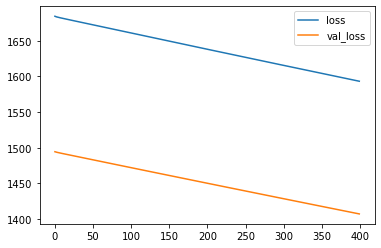

In [141]:
losses.plot()

<h4> From the plot we can see that the training loss and validation loss decreasing and being almost stable after that, giving us perfect behaviour and no overfitting <h4>

In [142]:
model.evaluate(X_test, y_test, verbose=0)

1407.2152099609375

In [143]:
model.evaluate(X_train, y_train, verbose=0)

1592.9775390625

In [144]:
test_pred=model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [146]:
np.sqrt(mean_squared_error(y_test, test_pred))

37.51286736348636

In [147]:
mean_absolute_error(y_test, test_pred)

35.70488624362946

<h3>Comparing the accuracies of all the models<h3>

1)Linear Regression                -   accuracy score -  64.30%,          cross_val_score  -  57.60% <h3> 

2)Lasso Regression                 -   accuracy score -  51.75%,          cross_val_score  -  48.68%  <h3> 

3)Ridge Regression                 -   accuracy score-   60.92%,           cross_val_score  -  56.66%<h3>

4)Decision Tree                    -accuracy score - 53.40%,            cross_val_score - 22.72%,
score after hypertuning parameter  -  60.78%<h3>

4)Decision Tree                    -accuracy score - 74.61%,            cross_val_score - 67.49%,
score after hypertuning parameter  -  61.69%<h3>

6)Bagging Techniques-          *) DecisionTreeRegressor- accuracy score - 75.49%, *) RandomForestRegressor-accuracy score-77.37%<h3> 

7)Boosting techniques- *) Gradient Descent - accuracy score-68.47%,
  *) XGBoost - accuracy score- 64.25%,                            
  *) CatBoost- accuracy score-71.66% ,                 
  *)LightBoost - accuracy score-69.11%<h3>

<h3>Drawbacks of each technique's Assumptions<h3>

1) Linear Regression - As we know that linear regression assumes that the data is independent of each other, which is not true especially in our case. The latitude and longitude of the house location were dependent with each other in predicting the house price. Also linear regression is sensitive to outliers. That is why I am not recommending this algorithm model.<h4> 

2) Lasso Regression - We can see that the accuracy score and cross validation score of Lasso regression is low compared to other model scores. In Lasso regression, when there are correlated variables, it retains only one variable and sets other correlated variables to zero. That will possibly lead to some loss of information resulting in lower accuracy in our model. Thus I cannot recommend this algorithm for our model.<h4>

3) Ridge Regression - The main issue with Ridge regression is that it follows same assumptions as linear regression. Thus, I cannot recommend this algorithm for our model due to low accuracy.<h4>

4) Decision Tree - It randomly selects node randomly to be its root which automatically results in lower accuracy than any other models. Also, as the number of splits increases in a decision tree, the time required to build the tree also increases. Trees with a large number of splits are however prone to overfitting resulting in poor accuracy. This is the reason I do not recommend this algorithm for this model.<h4>

5) Random Forest - Our model has performed considerably well when using random forest algorithm. The reason is that Random forest adds additional randomness to the model while growing trees. When splitting a node, it searches for the best feature among a random subset of features instead of looking for the most important feature. Thus, it reduces the overfitting problem in decision trees and lessens the variance, improving accuracy. I would recommend this algorithm for this model.<h4>

6) Bagging Techniques - As we know that both bagging and random forests are ensemble-based algorithms that aim to reduce the complexity of models that overfit the training data. But the main aim of bagging technique is to train a bunch of unpruned decision trees on different random subsets of the training set, sampling with replacement. While in our case, both algorithms have great accuracy score, bagging is effective by reducing the complexity of overfitting models. We would too recommend this algorithm<h4> 



7) Boosting Techniques - Boosting is a resilient method that curbs over-fitting easily. One disadvantage of boosting is that it is sensitive to outliers since every classifier is obliged to fix the errors in the predecessors.It can be considered but as validation score is less, I cannot recommend this algorithm <h4> 

8) Artificial Neural Network(ANN) - We are just comparing the other algorithms of machine learning with the ANN here. There is not much improvement in the ANN algorithm so we would not be recommending this too.<h4>

<h3>Final Recommendation - Based on the accuracy score and the type of dataset, I would recommend the random forest algorithm or bagging technique. It is because both are great while handling outliers and doesn't allow model to overfit.<h3>